In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\user\anac\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 속도에 따른 제동거리 예측 모델 만들기

In [33]:
tf.set_random_seed(777)
car=np.loadtxt("data/cars.csv",delimiter=",",unpack=True)
# car
# print(np.shape(car)) #1행 속도/2행 제동거리
xx=car[0] #속도
yy=car[1] #제동거리
# print(xx)
#선형모델이 적합하다는 전제

#y hat=wx+b (w와 b는 variable, 주어진 x는 placeholder)
x=tf.placeholder(tf.float32) #"float"도 됨
y=tf.placeholder(tf.float32)
w=tf.Variable(tf.random_normal([1],-1,1)) #[1](한 개),-1(평균),1(편차)
b=tf.Variable(tf.random_normal([1],-1,1))
hf=w*x+b
cost= tf.reduce_mean((hf-y)**2)
optimizer=tf.train.GradientDescentOptimizer(0.0035)
train=optimizer.minimize(cost) # W가 낮아지는 방향으로 w,b갱신
###그래프 정의###

###그래프 실행###
sess=tf.Session() #세션이 나오면 자동적으로 초기화
sess.run(tf.global_variables_initializer())
##결국 train 실행이 핵심, 실행하려면 cost필요, hf와 y 필요 w와b는 변수니까 
#feed_dict 해줄 것은 plceholder x,y (주어진값들)

print("before w=",sess.run(w))
print("before b=",sess.run(b))
for i in range(2001):
    sess.run(train, feed_dict={x:xx, y:yy})
    if i%20==0:
        print(i,sess.run(cost, feed_dict={x:xx,y:yy}))
        print("w=",sess.run(w))
        print("b=",sess.run(b))
# sess.run(train, feed_dict={x:xx, y:yy})
# print("w=",sess.run(w))
# print("b=",sess.run(b))
# sess.run(train, feed_dict={x:xx, y:yy})
# print("w2=",sess.run(w))
# print("b2=",sess.run(b))
# print("cost",sess.run(cost))


before w= [0.5414499]
before b= [-2.6968942]
0 1492.0535
w= [5.2169333]
b= [-2.4355242]
20 252.5014
w= [3.1718252]
b= [-2.7708802]
40 249.12244
w= [3.0875645]
b= [-2.988948]
60 248.48816
w= [3.0952199]
b= [-3.198603]
80 247.87778
w= [3.1070254]
b= [-3.405001]
100 247.28482
w= [3.1188614]
b= [-3.608425]
120 246.7088
w= [3.1305368]
b= [-3.8089287]
140 246.14914
w= [3.142045]
b= [-4.006555]
160 245.60545
w= [3.153388]
b= [-4.201345]
180 245.07722
w= [3.1645682]
b= [-4.3933406]
200 244.56406
w= [3.175588]
b= [-4.58258]
220 244.06557
w= [3.18645]
b= [-4.7691035]
240 243.5812
w= [3.1971555]
b= [-4.9529486]
260 243.1107
w= [3.2077076]
b= [-5.134157]
280 242.65361
w= [3.218109]
b= [-5.312764]
300 242.20952
w= [3.22836]
b= [-5.488808]
320 241.77806
w= [3.2384644]
b= [-5.662326]
340 241.35895
w= [3.2484238]
b= [-5.8333535]
360 240.95174
w= [3.2582402]
b= [-6.001926]
380 240.5562
w= [3.267916]
b= [-6.1680794]
400 240.17188
w= [3.2774527]
b= [-6.331848]
420 239.79852
w= [3.2868526]
b= [-6.4932666]

속도30일 때 예측 제동거리:  [97.7501]


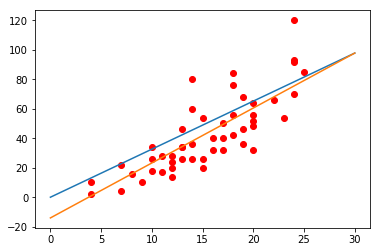

In [34]:
#w,b를 구했으니 입력값을 넣어보자
print("속도30일 때 예측 제동거리: ",sess.run(hf, feed_dict={x:[30]})) 
#~~~~~feed_dict={x:[30,40,50]}))[1] 결과값이 리스트로 나오기때문에 인덱싱도 가능하다

#simple 회귀선 시각화
y1=sess.run(hf,feed_dict={x:0})
y2=sess.run(hf,feed_dict={x:30})
plt.plot(xx,yy,'ro') #xx와 yy가 하나씩 대응
plt.plot([0,30],[0,y2]) #같은식으로 대응됨 (0,0)과 (30,97)을 잇는 선
plt.plot([0,30],[y1,y2])
plt.show()

In [49]:
import numpy as np
def without_normalization():
    data = [[828.659973, 833.450012, 908100, 828.349976, 831.659973],
            [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
            [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
            [816, 820.958984, 1008100, 815.48999, 819.23999],
            [819.359985, 823, 1188100, 818.469971, 818.97998],
            [819, 823, 1198100, 816, 820.450012],
            [811.700012, 815.25, 1098100, 809.780029, 813.669983],
            [809.51001, 816.659973, 1398100, 804.539978, 809.559998]]
    print(np.shape(data))
    data=np.transpose(data)
    print(np.shape(data))
    print(data) #행들은 차례로 시가,고가,저가 등등
    print("-"*50)
    x=data[:-1].transpose().astype(np.float32) #알고싶은 데이터가 마지막열이라서 이렇게 분리 가능
    y=data[-1].transpose().astype(np.float32)
    print(x.shape) #(8,4) w는 feature에 따라 4개 필요!
    print(y.shape)
    w=tf.Variable(tf.random_uniform([4,1],-1,1))
    b=tf.Variable(tf.random_uniform([1],-1,1))
    
    
    hf=tf.matmul(x,w)+b #matrix mul, 즉 요소간 곱셈
    cost=tf.reduce_mean((hf-y)**2)
    optimizer=tf.train.GradientDescentOptimizer(0.001)
    train=optimizer.minimize(cost)
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())
    for i in range(201):
        sess.run(train)
        if i%20==0:
            print(i,sess.run(cost))
    
without_normalization() 

#편차가 큰 것의 영향을 제일 많이 받을 수밖에 없다!!!표준화,정규화 필수

(8, 5)
(5, 8)
[[8.28659973e+02 8.23020020e+02 8.19929993e+02 8.16000000e+02
  8.19359985e+02 8.19000000e+02 8.11700012e+02 8.09510010e+02]
 [8.33450012e+02 8.28070007e+02 8.24400024e+02 8.20958984e+02
  8.23000000e+02 8.23000000e+02 8.15250000e+02 8.16659973e+02]
 [9.08100000e+05 1.82810000e+06 1.43810000e+06 1.00810000e+06
  1.18810000e+06 1.19810000e+06 1.09810000e+06 1.39810000e+06]
 [8.28349976e+02 8.21655029e+02 8.18979980e+02 8.15489990e+02
  8.18469971e+02 8.16000000e+02 8.09780029e+02 8.04539978e+02]
 [8.31659973e+02 8.28070007e+02 8.24159973e+02 8.19239990e+02
  8.18979980e+02 8.20450012e+02 8.13669983e+02 8.09559998e+02]]
--------------------------------------------------
(8, 4)
(8,)
0 2.4498961e+29
20 nan
40 nan
60 nan
80 nan
100 nan
120 nan
140 nan
160 nan
180 nan
200 nan


## 표준화 정규화

In [63]:
def min_max_scaler(data):
    data=np.transpose(data)
    print(data.shape)
#     min=np.min(data)
    max=np.max(data, axis=0).astype(np.float32)
    min=np.min(data, axis=0).astype(np.float32)
#     min=np.min(data, axis=1).astype(np.float32) #위에서 T를 했기에 각 행에 대한 최솟값
#     print(min)    
#     max=np.max(data,axis=1).astype(np.float32)
#     print(max)
#     print(max-min) #세번째 feature가 너무 큰 수로 툭 튀는걸 알 수 있음
    print(min)
    print(min.shape)
    print(max)
    print(max.shape)
    return (data-min)/(max-min)
    
data = [[828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998]]
print(min_max_scaler(data))


(5, 8)
[828.35  821.655 818.98  815.49  818.47  816.    809.78  804.54 ]
(8,)
[ 908100. 1828100. 1438100. 1008100. 1188100. 1198100. 1098100. 1398100.]
(8,)
[[ 3.41680932e-07  7.47007529e-07  6.60978981e-07  5.06321467e-07
   7.49623654e-07  2.50567117e-06  1.74974917e-06  3.55689399e-06]
 [ 5.62128945e-06  3.51067346e-06  3.77103957e-06  5.42944299e-06
   3.81546356e-06  5.84656606e-06  4.98498069e-06  8.67389537e-06]
 [ 1.00000003e+00  9.99999984e-01  1.00000001e+00  1.00000001e+00
   1.00000003e+00  1.00000000e+00  9.99999973e-01  9.99999971e-01]
 [ 4.56382034e-13 -1.62468396e-13 -3.26136674e-13 -2.32680008e-13
   2.50045997e-13  0.00000000e+00 -2.70552834e-13 -1.95690395e-14]
 [ 3.64829818e-06  3.51067346e-06  3.60402213e-06  3.72288044e-06
   4.29560552e-07  3.71675559e-06  3.54505447e-06  3.59266882e-06]]


In [73]:
def min_max_scaler_by_row(data):
    data=np.transpose(data)
    print(data.shape)
    print(data)
    min=np.min(data, axis=1)
    max=np.max(data, axis=1)
    print(max.shape) #(5,)는 (1,5)와 같다 
    print(data.shape) #(5,8)
    #브로드캐스팅을 가능하게 해주기 위해
    max=max.reshape(5,1)
    min=min.reshape(5,1)
    print((data-min)/(max-min))
data = [[828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998]]
print(min_max_scaler_by_row(data))

(5, 8)
[[8.28659973e+02 8.23020020e+02 8.19929993e+02 8.16000000e+02
  8.19359985e+02 8.19000000e+02 8.11700012e+02 8.09510010e+02]
 [8.33450012e+02 8.28070007e+02 8.24400024e+02 8.20958984e+02
  8.23000000e+02 8.23000000e+02 8.15250000e+02 8.16659973e+02]
 [9.08100000e+05 1.82810000e+06 1.43810000e+06 1.00810000e+06
  1.18810000e+06 1.19810000e+06 1.09810000e+06 1.39810000e+06]
 [8.28349976e+02 8.21655029e+02 8.18979980e+02 8.15489990e+02
  8.18469971e+02 8.16000000e+02 8.09780029e+02 8.04539978e+02]
 [8.31659973e+02 8.28070007e+02 8.24159973e+02 8.19239990e+02
  8.18979980e+02 8.20450012e+02 8.13669983e+02 8.09559998e+02]]
(5,)
(5, 8)
[[1.         0.70548491 0.54412549 0.33890353 0.51436    0.49556179
  0.11436064 0.        ]
 [1.         0.70439552 0.50274824 0.31368023 0.4258239  0.4258239
  0.         0.07747099]
 [0.         1.         0.57608696 0.10869565 0.30434783 0.31521739
  0.20652174 0.5326087 ]
 [1.         0.71881783 0.60646801 0.45989134 0.58504805 0.48131134
  0.22007